In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
train=pd.read_csv('wineq-w.csv')
test= pd.read_csv('wineq-r.csv')
train_len = len(train)
test_len = len(test)
print(train_len)
print(test_len)

4898
1599


In [4]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
m

In [7]:
train_len = len(train)
test_len = len(test)
train_quality = train['quality']
train.drop(columns=['quality'], inplace=True)

In [8]:
print(train.shape, test.shape)
print(train_quality.shape)

(4898, 11) (1599, 11)
(4898,)


In [9]:
wineq=pd.concat([train, test], sort=False)
wineq.info()
wineq.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 11 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
dtypes: float64(11)
memory usage: 609.1 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


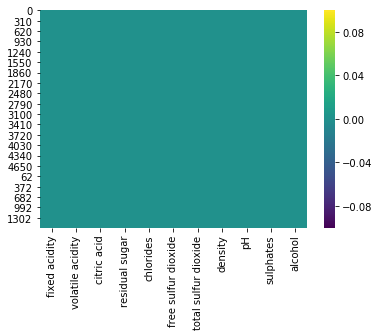

In [10]:
sns.heatmap(wineq.isnull(), cmap='viridis')

In [11]:
wineq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


{'whiskers': [<matplotlib.lines.Line2D at 0x1e7366ab550>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7366abc88>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e7366ab320>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7366bb358>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7366bb6a0>],
 'means': []}

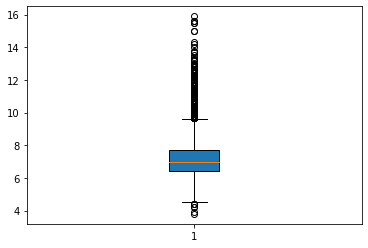

In [12]:
#treating the outliers for fixed acidity
plt.boxplot(wineq['fixed acidity'],vert=True,patch_artist=True)

(array([0.00801387, 0.14641214, 0.41315954, 0.17032655, 0.04859204,
        0.02251516, 0.01043075, 0.00521538, 0.00089043, 0.00089043]),
 array([ 3.8 ,  5.01,  6.22,  7.43,  8.64,  9.85, 11.06, 12.27, 13.48,
        14.69, 15.9 ]),
 <a list of 10 Patch objects>)

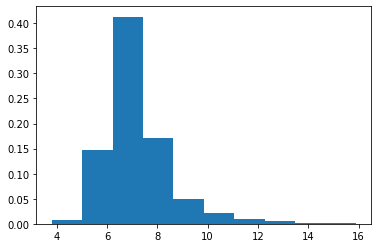

In [13]:
plt.hist(wineq['fixed acidity'],normed=True)

In [14]:
wineq['fixed acidity'].describe()

count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [15]:
1.5*(7.7-6.4)

1.9499999999999997

{'whiskers': [<matplotlib.lines.Line2D at 0x1e736795b00>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7367a2320>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e736795898>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7367a29b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7367a2cf8>],
 'means': []}

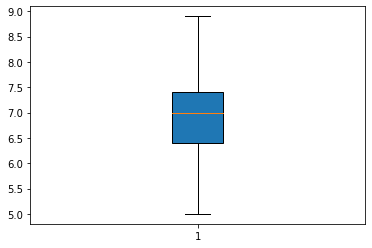

In [16]:
wineq.loc[(wineq['fixed acidity']>=9), 'fixed acidity'] =7
wineq.loc[(wineq['fixed acidity']<5), 'fixed acidity'] =7
plt.boxplot(wineq['fixed acidity'],vert=True,patch_artist=True)

(array([0.04814846, 0.09471827, 0.2395583 , 0.37966241, 0.48306319,
        0.64132164, 0.29757324, 0.18391131, 0.12037114, 0.07577462]),
 array([5.  , 5.39, 5.78, 6.17, 6.56, 6.95, 7.34, 7.73, 8.12, 8.51, 8.9 ]),
 <a list of 10 Patch objects>)

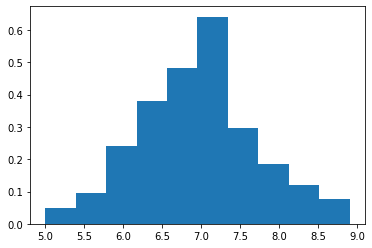

In [17]:
plt.hist(wineq['fixed acidity'],normed=True)

In [18]:
wineq['fixed acidity'].describe()

count    6497.000000
mean        6.939811
std         0.765968
min         5.000000
25%         6.400000
50%         7.000000
75%         7.400000
max         8.900000
Name: fixed acidity, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7368877b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e736887f98>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e7368452b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e736891668>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7368919b0>],
 'means': []}

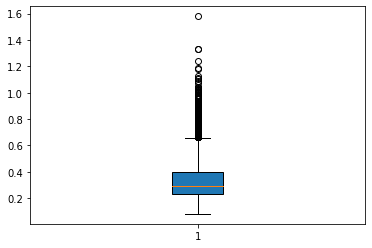

In [19]:
#treating outliers for volatile acidity
plt.boxplot(wineq['volatile acidity'],vert=True,patch_artist=True)

(array([1.62126109e+00, 3.08039608e+00, 1.02201016e+00, 6.21825458e-01,
        2.19588528e-01, 7.18280232e-02, 2.36006362e-02, 3.07834385e-03,
        2.05222923e-03, 1.02611462e-03]),
 array([0.08, 0.23, 0.38, 0.53, 0.68, 0.83, 0.98, 1.13, 1.28, 1.43, 1.58]),
 <a list of 10 Patch objects>)

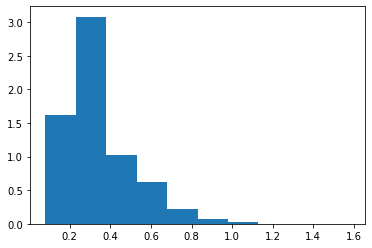

In [20]:
plt.hist(wineq['volatile acidity'],normed=True)

In [21]:
wineq['volatile acidity'].describe()

count    6497.000000
mean        0.339666
std         0.164636
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile acidity, dtype: float64

In [22]:
1.5*(0.40-0.23)

0.255

In [23]:
#wineq['volatile acidity'].quantile(q=0.99,axis=0,numeric_only=True,interpolation='linear')
wineq['volatile acidity'].quantile(q=0.999999,interpolation='linear')

1.5783760000000076

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7369709e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e736970f28>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e736970780>],
 'medians': [<matplotlib.lines.Line2D at 0x1e73697c898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e73697cbe0>],
 'means': []}

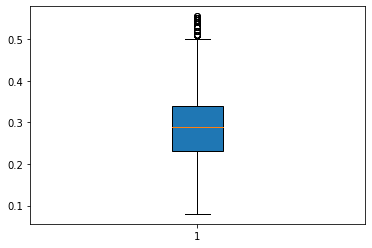

In [24]:
wineq.loc[(wineq['volatile acidity']>=0.56), 'volatile acidity'] =.29
plt.boxplot(wineq['volatile acidity'],vert=True,patch_artist=True)

(array([0.23978678, 1.56509482, 3.30192883, 3.26628484, 6.18585096,
        2.58256847, 1.53917193, 0.90082062, 0.83277302, 0.6383513 ]),
 array([0.08  , 0.1275, 0.175 , 0.2225, 0.27  , 0.3175, 0.365 , 0.4125,
        0.46  , 0.5075, 0.555 ]),
 <a list of 10 Patch objects>)

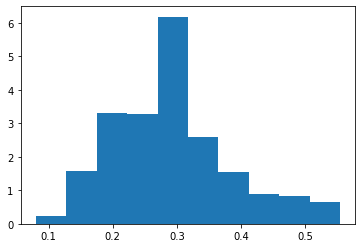

In [25]:
plt.hist(wineq['volatile acidity'],normed=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e736a47940>,
 'caps': [<matplotlib.lines.Line2D at 0x1e736a47e48>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e736a476d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e736a547b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e736a54b00>],
 'means': []}

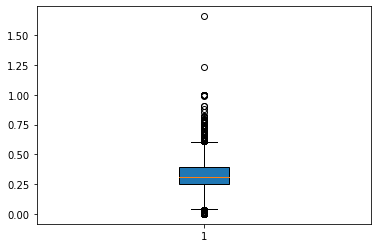

In [26]:
#treating outliers for citric acid
plt.boxplot(wineq['citric acid'],vert=True,patch_artist=True)

(array([7.10244395e-01, 2.88641097e+00, 1.90912951e+00, 3.89429041e-01,
        1.16828712e-01, 4.63606002e-03, 5.56327202e-03, 9.27212003e-04,
        0.00000000e+00, 9.27212003e-04]),
 array([0.   , 0.166, 0.332, 0.498, 0.664, 0.83 , 0.996, 1.162, 1.328,
        1.494, 1.66 ]),
 <a list of 10 Patch objects>)

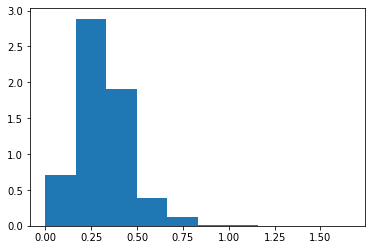

In [27]:
plt.hist(wineq['citric acid'],normed=True)

In [28]:
wineq['citric acid'].describe()

count    6497.000000
mean        0.318633
std         0.145318
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64

In [29]:
1.5*(0.39-0.25)

0.21000000000000002

In [30]:
wineq['citric acid'].quantile(q=0.99999,interpolation='linear')

1.6320672000001286

{'whiskers': [<matplotlib.lines.Line2D at 0x1e737b08b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1e737b15358>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e737b08908>],
 'medians': [<matplotlib.lines.Line2D at 0x1e737b159e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e737b15d30>],
 'means': []}

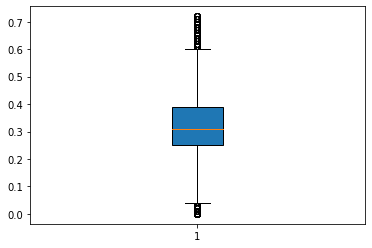

In [31]:
wineq.loc[(wineq['citric acid']>=0.73), 'citric acid'] =0.31
plt.boxplot(wineq['citric acid'],vert=True,patch_artist=True)

(array([0.87433516, 0.58360269, 0.98549758, 3.05269099, 3.82441469,
        2.21255964, 1.45366237, 0.45961384, 0.24370222, 0.19880971]),
 array([0.   , 0.072, 0.144, 0.216, 0.288, 0.36 , 0.432, 0.504, 0.576,
        0.648, 0.72 ]),
 <a list of 10 Patch objects>)

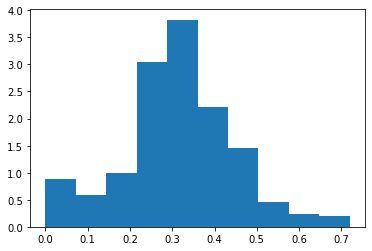

In [32]:
plt.hist(wineq['citric acid'],normed=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e737bf6710>,
 'caps': [<matplotlib.lines.Line2D at 0x1e737bf6eb8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e737bf64a8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e737c03588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e737c038d0>],
 'means': []}

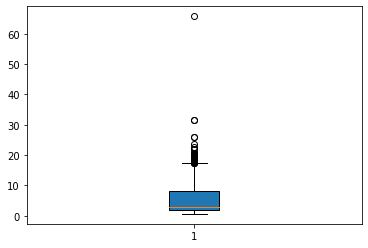

In [33]:
#treating outliers for residual sugar
plt.boxplot(wineq['residual sugar'],vert=True,patch_artist=True)

(array([1.07435145e-01, 3.29552762e-02, 1.25824944e-02, 3.30497039e-04,
        4.72138627e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.36069314e-05]),
 array([ 0.6 ,  7.12, 13.64, 20.16, 26.68, 33.2 , 39.72, 46.24, 52.76,
        59.28, 65.8 ]),
 <a list of 10 Patch objects>)

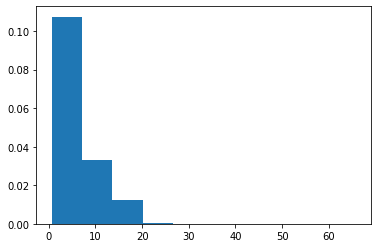

In [34]:
plt.hist(wineq['residual sugar'],normed=True)

In [35]:
wineq['residual sugar'].describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

In [36]:
1.5*(8.1-1.8)

9.45

In [37]:
wineq['residual sugar'].quantile(q=0.9999,interpolation='linear')

43.5836799999779

In [38]:
 np.percentile(wineq['residual sugar'], [99.2,100])

array([18.75, 65.8 ])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e737cd0ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e737cdd2e8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e737cd0860>],
 'medians': [<matplotlib.lines.Line2D at 0x1e737cdd978>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e737cddcc0>],
 'means': []}

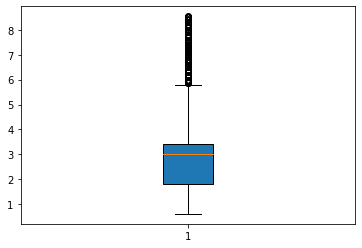

In [39]:
wineq.loc[(wineq['residual sugar']>=8.6), 'residual sugar'] =  3
plt.boxplot(wineq['residual sugar'],vert=True,patch_artist=True)

(array([0.1304908 , 0.31557865, 0.17869883, 0.33900504, 0.04607835,
        0.05711393, 0.03968934, 0.0503377 , 0.0505313 , 0.0503377 ]),
 array([0.6  , 1.395, 2.19 , 2.985, 3.78 , 4.575, 5.37 , 6.165, 6.96 ,
        7.755, 8.55 ]),
 <a list of 10 Patch objects>)

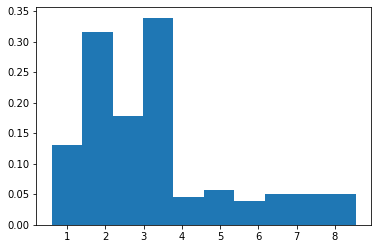

In [40]:
plt.hist(wineq['residual sugar'],normed=True)

In [41]:
wineq['residual sugar'].describe()

count    6497.000000
mean        3.166323
std         1.887896
min         0.600000
25%         1.800000
50%         3.000000
75%         3.400000
max         8.550000
Name: residual sugar, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e737dc0128>,
 'caps': [<matplotlib.lines.Line2D at 0x1e737dc0908>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e737db2e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1e737dc0f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e737dc9320>],
 'means': []}

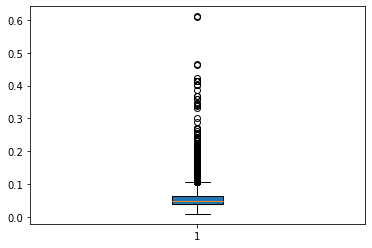

In [42]:
#treating outliers for chlorides
plt.boxplot(wineq['chlorides'],vert=True,patch_artist=True)

(array([1.29397826e+01, 3.27010115e+00, 2.35222288e-01, 8.69299759e-02,
        2.04541120e-02, 2.30108760e-02, 2.55676400e-02, 5.11352799e-03,
        0.00000000e+00, 5.11352799e-03]),
 array([0.009 , 0.0692, 0.1294, 0.1896, 0.2498, 0.31  , 0.3702, 0.4304,
        0.4906, 0.5508, 0.611 ]),
 <a list of 10 Patch objects>)

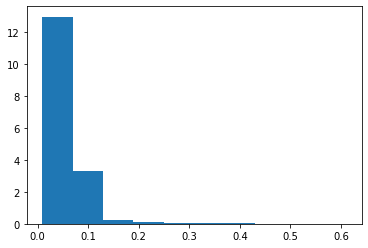

In [43]:
plt.hist(wineq['chlorides'],normed=True)

In [44]:
wineq['chlorides'].describe()

count    6497.000000
mean        0.056034
std         0.035034
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

In [45]:
1.5*(0.065-0.038)

0.04050000000000001

In [46]:
wineq['chlorides'].quantile(q=0.999,interpolation='linear')

0.415

{'whiskers': [<matplotlib.lines.Line2D at 0x1e737e9d6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e737e9deb8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e737e9d470>],
 'medians': [<matplotlib.lines.Line2D at 0x1e737ea9588>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e737ea98d0>],
 'means': []}

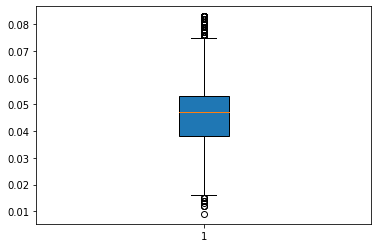

In [47]:
wineq.loc[(wineq['chlorides']>=0.084), 'chlorides'] =  0.047
plt.boxplot(wineq['chlorides'],vert=True,patch_artist=True)

(array([ 0.37439317,  2.03836282, 11.58538868, 21.96439937, 28.86987341,
        37.52251559, 11.19019589,  6.69747784,  6.40628315,  8.48624521]),
 array([0.009 , 0.0164, 0.0238, 0.0312, 0.0386, 0.046 , 0.0534, 0.0608,
        0.0682, 0.0756, 0.083 ]),
 <a list of 10 Patch objects>)

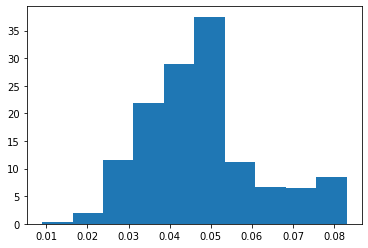

In [48]:
plt.hist(wineq['chlorides'],normed=True)

In [49]:
wineq['chlorides'].describe()

count    6497.000000
mean        0.047399
std         0.013895
min         0.009000
25%         0.038000
50%         0.047000
75%         0.053000
max         0.083000
Name: chlorides, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e737f8a0f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e737f8a8d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e737f7be48>],
 'medians': [<matplotlib.lines.Line2D at 0x1e737f8af60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e737f942e8>],
 'means': []}

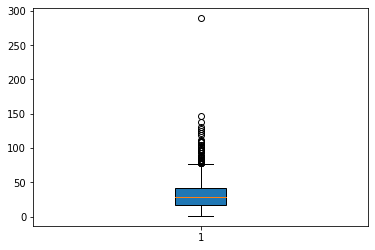

In [50]:
#treating outliers for free sulfur dioxide
plt.boxplot(wineq['free sulfur dioxide'],vert=True,patch_artist=True)

(array([1.81280249e-02, 1.43014725e-02, 2.14308313e-03, 1.06886939e-04,
        3.20660818e-05, 5.34434696e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.34434696e-06]),
 array([  1. ,  29.8,  58.6,  87.4, 116.2, 145. , 173.8, 202.6, 231.4,
        260.2, 289. ]),
 <a list of 10 Patch objects>)

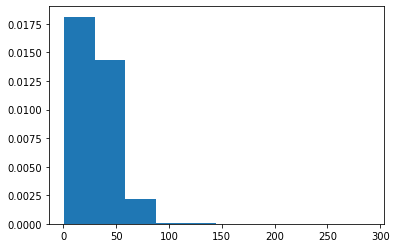

In [51]:
plt.hist(wineq['free sulfur dioxide'],normed=True)

In [52]:
wineq['free sulfur dioxide'].describe()

count    6497.000000
mean       30.525319
std        17.749400
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

In [53]:
1.5*(41-17)

36.0

In [54]:
wineq['free sulfur dioxide'].quantile(q=0.99,interpolation='linear')

77.0

{'whiskers': [<matplotlib.lines.Line2D at 0x1e738063cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7380704e0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e738063a58>],
 'medians': [<matplotlib.lines.Line2D at 0x1e738070b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e738070eb8>],
 'means': []}

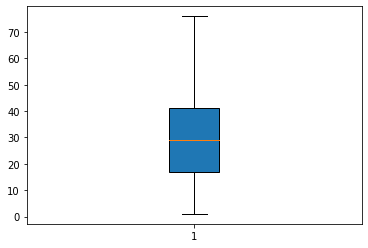

In [55]:
wineq.loc[(wineq['free sulfur dioxide']>=77), 'free sulfur dioxide'] =  29
plt.boxplot(wineq['free sulfur dioxide'],vert=True,patch_artist=True)

(array([0.01237494, 0.01732081, 0.02152788, 0.02214355, 0.0218152 ,
        0.01354471, 0.01212867, 0.00671079, 0.0043302 , 0.00143656]),
 array([ 1. ,  8.5, 16. , 23.5, 31. , 38.5, 46. , 53.5, 61. , 68.5, 76. ]),
 <a list of 10 Patch objects>)

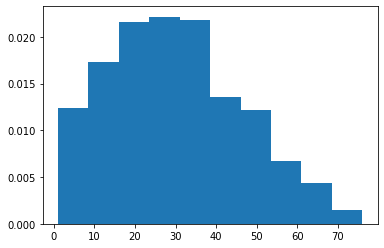

In [56]:
plt.hist(wineq['free sulfur dioxide'],normed=True)

In [57]:
wineq['free sulfur dioxide'].describe()

count    6497.000000
mean       29.844544
std        16.220056
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max        76.000000
Name: free sulfur dioxide, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7381496a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e738149e80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e738149438>],
 'medians': [<matplotlib.lines.Line2D at 0x1e738155550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e738155898>],
 'means': []}

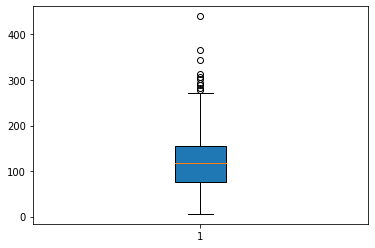

In [58]:
#treating outliers for total sulfur dioxide
plt.boxplot(wineq['total sulfur dioxide'],vert=True,patch_artist=True)

(array([3.85856925e-03, 3.47200303e-03, 7.26673566e-03, 5.36936934e-03,
        2.55701142e-03, 4.75228198e-04, 2.83718327e-05, 7.09295818e-06,
        3.54647909e-06, 3.54647909e-06]),
 array([  6. ,  49.4,  92.8, 136.2, 179.6, 223. , 266.4, 309.8, 353.2,
        396.6, 440. ]),
 <a list of 10 Patch objects>)

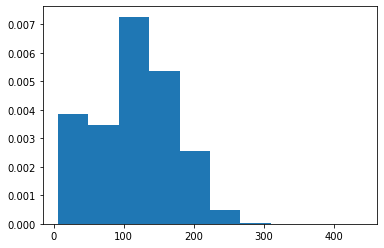

In [59]:
plt.hist(wineq['total sulfur dioxide'],normed=True)

In [60]:
wineq['total sulfur dioxide'].describe()

count    6497.000000
mean      115.744574
std        56.521855
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

In [61]:
1.5*(156-77)

118.5

In [62]:
wineq['total sulfur dioxide'].quantile(q=0.999 ,interpolation='linear')

291.5200000000041

{'whiskers': [<matplotlib.lines.Line2D at 0x1e738221c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1e73822d4a8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e738221a20>],
 'medians': [<matplotlib.lines.Line2D at 0x1e73822db38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e73822de80>],
 'means': []}

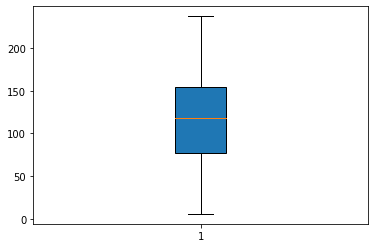

In [63]:
wineq.loc[(wineq['total sulfur dioxide']>=238), 'total sulfur dioxide'] =  118
plt.boxplot(wineq['total sulfur dioxide'],vert=True,patch_artist=True)

(array([0.00429102, 0.00324492, 0.00295175, 0.00493734, 0.00770919,
        0.00684299, 0.00561698, 0.00425771, 0.00240537, 0.00103278]),
 array([  6. ,  29.1,  52.2,  75.3,  98.4, 121.5, 144.6, 167.7, 190.8,
        213.9, 237. ]),
 <a list of 10 Patch objects>)

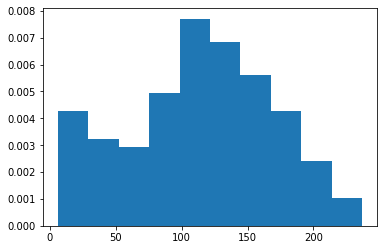

In [64]:
plt.hist(wineq['total sulfur dioxide'],normed=True)

In [65]:
wineq['total sulfur dioxide'].describe()

count    6497.000000
mean      114.320840
std        54.547593
min         6.000000
25%        77.000000
50%       118.000000
75%       154.000000
max       237.000000
Name: total sulfur dioxide, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7382f8be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e738305400>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e7382f8978>],
 'medians': [<matplotlib.lines.Line2D at 0x1e738305a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e738305dd8>],
 'means': []}

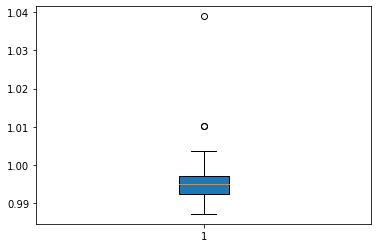

In [66]:
#treating outliers for density
plt.boxplot(wineq['density'],vert=True,patch_artist=True)

(array([4.74481571e+01, 1.08160433e+02, 3.68249925e+01, 2.67062798e-01,
        5.93472884e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.96736442e-02]),
 array([0.98711 , 0.992297, 0.997484, 1.002671, 1.007858, 1.013045,
        1.018232, 1.023419, 1.028606, 1.033793, 1.03898 ]),
 <a list of 10 Patch objects>)

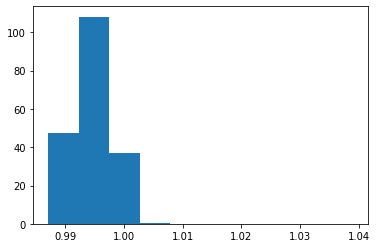

In [67]:
plt.hist(wineq['density'],normed=True)

In [68]:
wineq['density'].describe()

count    6497.000000
mean        0.994697
std         0.002999
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.038980
Name: density, dtype: float64

In [69]:
1.5*(0.9969-0.9923)

0.006900000000000073

In [70]:
wineq['density'].quantile(q=0.99 ,interpolation='linear')

1.0006

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7383df3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7383dfba8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e7383df160>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7383dff98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7383e95c0>],
 'means': []}

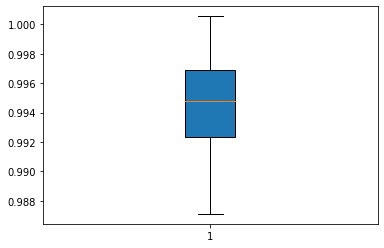

In [71]:
wineq.loc[(wineq['density']>=1.0006), 'density'] = 0.9948 
plt.boxplot(wineq['density'],vert=True,patch_artist=True)

(array([  2.86304302,  29.31756049,  70.31633648,  94.36589781,
        102.72598342, 101.80980966, 124.59963206, 110.51346042,
         75.01172702,  32.52416866]),
 array([0.98711 , 0.988454, 0.989798, 0.991142, 0.992486, 0.99383 ,
        0.995174, 0.996518, 0.997862, 0.999206, 1.00055 ]),
 <a list of 10 Patch objects>)

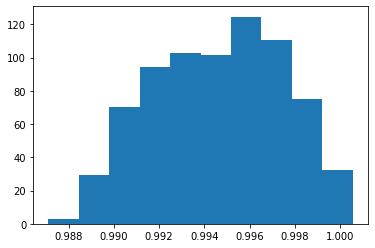

In [72]:
plt.hist(wineq['density'],normed=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7384b8940>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7384b8e48>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e7384b86d8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7384c57b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7384c5b00>],
 'means': []}

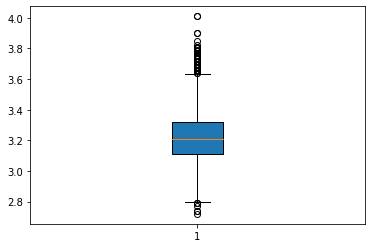

In [73]:
#treating outliers for pH
plt.boxplot(wineq['pH'],vert=True,patch_artist=True)

(array([0.0190905 , 0.39851428, 1.471162  , 2.51875344, 1.98421931,
        0.95691154, 0.31380017, 0.07039624, 0.01431788, 0.00477263]),
 array([2.72 , 2.849, 2.978, 3.107, 3.236, 3.365, 3.494, 3.623, 3.752,
        3.881, 4.01 ]),
 <a list of 10 Patch objects>)

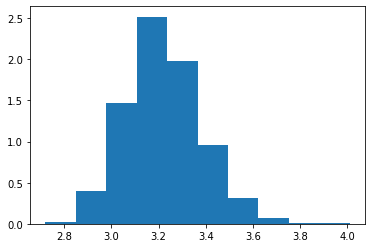

In [74]:
plt.hist(wineq['pH'],normed=True)

In [75]:
wineq['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e73859d160>,
 'caps': [<matplotlib.lines.Line2D at 0x1e73859d940>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e73858deb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e73859dfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7385a7358>],
 'means': []}

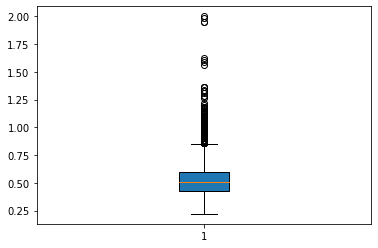

In [76]:
#treating outliers for sulphates
plt.boxplot(wineq['sulphates'],vert=True,patch_artist=True)

(array([0.88459151, 2.98409119, 1.33164313, 0.33031667, 0.05707042,
        0.01815877, 0.00518822, 0.00345881, 0.        , 0.00345881]),
 array([0.22 , 0.398, 0.576, 0.754, 0.932, 1.11 , 1.288, 1.466, 1.644,
        1.822, 2.   ]),
 <a list of 10 Patch objects>)

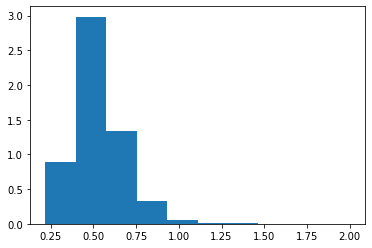

In [77]:
plt.hist(wineq['sulphates'],normed=True)

In [78]:
wineq['sulphates'].describe()

count    6497.000000
mean        0.531268
std         0.148806
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

In [79]:
1.5*(0.60-0.43)

0.255

In [80]:
wineq['sulphates'].quantile(q=0.96 ,interpolation='linear')

0.82

{'whiskers': [<matplotlib.lines.Line2D at 0x1e739633a58>,
 'caps': [<matplotlib.lines.Line2D at 0x1e739633f28>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e739633828>],
 'medians': [<matplotlib.lines.Line2D at 0x1e73963b898>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e73963bbe0>],
 'means': []}

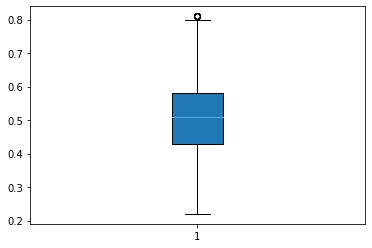

In [81]:
wineq.loc[(wineq['sulphates']>=0.82), 'sulphates'] = 0.51
plt.boxplot(wineq['sulphates'],vert=True,patch_artist=True)

(array([0.06000162, 0.54523209, 2.06353389, 2.83833738, 4.06445739,
        2.82268479, 2.05309882, 1.20785865, 0.75654213, 0.53740579]),
 array([0.22 , 0.279, 0.338, 0.397, 0.456, 0.515, 0.574, 0.633, 0.692,
        0.751, 0.81 ]),
 <a list of 10 Patch objects>)

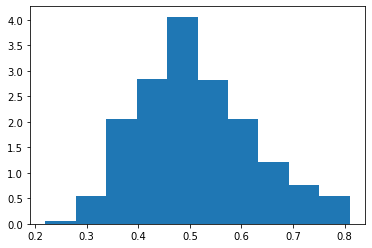

In [82]:
plt.hist(wineq['sulphates'],normed=True)

In [83]:
wineq['sulphates'].describe()

count    6497.000000
mean        0.512264
std         0.112304
min         0.220000
25%         0.430000
50%         0.510000
75%         0.580000
max         0.810000
Name: sulphates, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7397100f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e739710860>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e739701e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1e739710ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e739710f98>],
 'means': []}

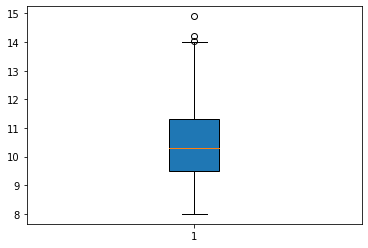

In [84]:
#treating outliers for alcohol
plt.boxplot(wineq['alcohol'],vert=True,patch_artist=True)

(array([8.92273580e-03, 2.52736492e-01, 3.70739672e-01, 2.57867065e-01,
        2.43590687e-01, 1.40086952e-01, 1.26925917e-01, 3.90369691e-02,
        9.14580420e-03, 2.23068395e-04]),
 array([ 8.  ,  8.69,  9.38, 10.07, 10.76, 11.45, 12.14, 12.83, 13.52,
        14.21, 14.9 ]),
 <a list of 10 Patch objects>)

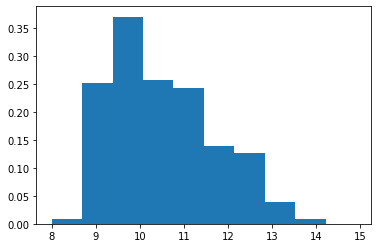

In [85]:
plt.hist(wineq['alcohol'],normed=True)

In [86]:
wineq['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [87]:
1.5*(11.30-9.5)

2.700000000000001

In [88]:
wineq['alcohol'].quantile(q=0.998 ,interpolation='linear')

14.0

{'whiskers': [<matplotlib.lines.Line2D at 0x1e7397f13c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7397f1b38>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1e7397d17f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7397f1f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e7397f8550>],
 'means': []}

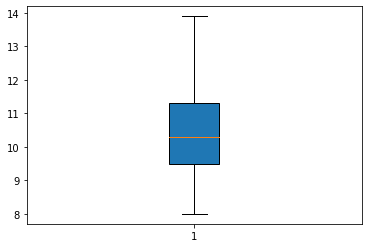

In [89]:
wineq.loc[(wineq['alcohol']>=14), 'alcohol'] = 10.30
plt.boxplot(wineq['alcohol'],vert=True,patch_artist=True)

(array([0.0044349 , 0.18000485, 0.39731506, 0.28174673, 0.26400712,
        0.23452806, 0.13174268, 0.12913392, 0.05556672, 0.01643523]),
 array([ 8.  ,  8.59,  9.18,  9.77, 10.36, 10.95, 11.54, 12.13, 12.72,
        13.31, 13.9 ]),
 <a list of 10 Patch objects>)

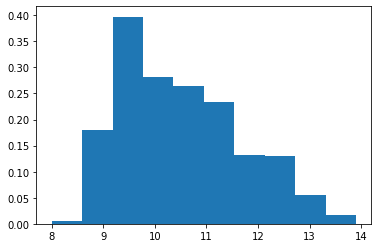

In [90]:
plt.hist(wineq['alcohol'],normed=True)

In [91]:
wineq['alcohol'].describe()

count    6497.000000
mean       10.483081
std         1.180160
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        13.900000
Name: alcohol, dtype: float64

In [92]:
train_quality.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [93]:
train_processed = wineq[:train_len]
train_processed = pd.concat([train_processed, train_quality], axis=1)

test_processed = wineq[train_len:]

print(train_processed.shape)
print(test_processed.shape)

(4898, 12)
(1599, 11)


In [94]:
train_processed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,3.0,0.045,45.0,170.0,0.9948,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [95]:
#Dividing the dataset into train and test dataset
y = train_processed['quality']

# Create the predictor variables; 
X = train_processed.iloc[:,:-1]

# Split into training and testing data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

In [97]:
#model1 :Decision trees
dtc_model = DecisionTreeClassifier(random_state=1, max_depth=4)
dtc_model.fit(train_X,train_y)


feature_importance = dict(zip(test_X.columns, dtc_model.feature_importances_))
print('Feature Importance: ', feature_importance)
print('\n')
print(max(feature_importance.values()))
print('\n')
#print(dtc_model.score(X=train_X, y=train_X))
print(dtc_model.score(X=test_X, y=test_y))


Feature Importance:  {'fixed acidity': 0.02344932086797067, 'volatile acidity': 0.28826162195246013, 'citric acid': 0.011430130713845505, 'residual sugar': 0.0, 'chlorides': 0.0, 'free sulfur dioxide': 0.06311768475927262, 'total sulfur dioxide': 0.0, 'density': 0.0, 'pH': 0.0, 'sulphates': 0.01837256577762723, 'alcohol': 0.5953686759288237}


0.5953686759288237


0.5102040816326531


In [104]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,60,70,90]}
dtc2 = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=9)
dtc2.fit(train_X, train_y)

# check best parameters
print(dtc2.best_params_)

# check mean score for the top performing parameters
print(dtc2.best_score_)

{'criterion': 'entropy', 'max_depth': 70}
0.5878028859243125


In [131]:
#Random forest
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(train_X, train_y)

print(rf_model.score(X=train_X, y=train_y))
print(rf_model.score(X=test_X, y=test_y))

0.9980942009256738
0.6571428571428571


In [142]:
# Train and Test the model using cross-validation with 10 folds
cv_scores = cross_val_score(rf_model, test_X, test_y, cv=10)

print(cv_scores)
print('cv_scores_mean: {}'.format(np.mean(cv_scores)))

[0.58730159 0.616      0.56451613 0.52845528 0.59016393 0.51639344
 0.53278689 0.50413223 0.525      0.6       ]
cv_scores_mean: 0.5564749494586732


In [143]:
#Logistic regression
lr_model = LogisticRegression(solver='lbfgs', random_state=1)
lr_model.fit(train_X,train_y)

print(lr_model.score(X=test_X, y=test_y))

0.5102040816326531


In [144]:
cv_scores = cross_val_score(lr_model, train_X, train_y, cv=25)

print(cv_scores)
print('cv_scores_mean: {}'.format(np.mean(cv_scores)))

[0.52980132 0.51333333 0.54       0.58       0.5033557  0.55405405
 0.53378378 0.47297297 0.5472973  0.5170068  0.52380952 0.51020408
 0.53061224 0.4829932  0.47260274 0.50684932 0.52739726 0.5
 0.56551724 0.49655172 0.56551724 0.53793103 0.54861111 0.51388889
 0.49305556]
cv_scores_mean: 0.5226858573194494


In [145]:
#OOB error score
rf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=200,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_X, train_y)
print(rf.oob_score_)

0.6457936291859515


In [146]:
pd.concat((pd.DataFrame(train_processed.iloc[:, :-1].columns, columns = ['Feature']), 
           pd.DataFrame(rf_model.feature_importances_, columns = ['Importance'])), 
          axis = 1).sort_values(by='Importance', ascending = False)[:20]

,Feature,Importance
10,alcohol,0.128111
1,volatile acidity,0.105169
7,density,0.099675
6,total sulfur dioxide,0.093613
5,free sulfur dioxide,0.093445
8,pH,0.090587
4,chlorides,0.084722
2,citric acid,0.081885
9,sulphates,0.081870
0,fixed acidity,0.072520


In [149]:
y_pred=rf_model.predict(test_X)
cm = pd.crosstab(test_y,y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
cm

Predicted,4,5,6,7,8,All
Actual,,,,,,
3,0,1,1,0,0,2
4,7,18,12,0,0,37
5,5,246,115,2,0,368
6,2,90,418,34,0,544
7,0,3,108,120,2,233
8,0,1,18,8,14,41
All,14,359,672,164,16,1225


In [151]:
output = pd.DataFrame({'Quality': test_y,
                       'Predicted_quality': y_pred})

output.to_csv('solution.csv', index=False)